----- Build dataset -----

In [1]:
from google.colab import files
uploaded = files.upload()

Saving anuka.zip to anuka.zip


In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['anuka.zip']), 'r')
data.extractall()

In [3]:
import os
!mkdir dataset_anuka
os.makedirs("dataset_anuka_vgg16/Tipo A_ Kunzea")
os.makedirs("dataset_anuka_vgg16/Tipo B_ Lepto")
!mkdir dataset_vgg16

In [4]:
dataset_anuka_dir = '/content/dataset_anuka'
dataset_vgg16_dir = '/content/dataset_anuka_vgg16'

In [5]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns

from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 
import pandas as pd 

In [7]:
kunsea_dir = '/content/anuka/Tipo A_ Kunzea/'
lepto_dir = '/content/anuka/Tipo B_ Lepto/'

kunsea_data = os.listdir(kunsea_dir)
print(len(kunsea_data))

lepto_data = os.listdir(lepto_dir)
print(len(lepto_data))

1200
1200


In [16]:
data = []
labels = []
for img in kunsea_data:
    try:
        img_read = plt.imread(kunsea_dir + "/" + img)
        #img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_read)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in lepto_data:
    try:
        img_read = plt.imread(lepto_data + "/" + img)
        #img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_read)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [17]:
image_data = np.array(data)
labels = np.array(labels)

In [18]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [20]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [21]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (960, 100, 100, 1)
SHAPE OF TESTING IMAGE DATA : (240, 100, 100, 1)
SHAPE OF TRAINING LABELS : (960, 2)
SHAPE OF TESTING LABELS : (240, 2)


----- CNN ----- 

In [22]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [23]:
def BuildCNN(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [24]:
#instantiate the model
height = 100
width = 100
classes = 2
channels = 1
modelCNN = BuildCNN(height = height, width = width, classes = classes, channels = channels)
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 32)       128       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0

In [25]:
#compile the model
modelCNN.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [26]:
#fit the model onto the dataset
history  = modelCNN.fit(x_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
15/15 [==============================] - 3s 21ms/step - loss: 1.0894 - accuracy: 0.5469
Epoch 2/20
15/15 [==============================] - 0s 20ms/step - loss: 0.7604 - accuracy: 0.6448
Epoch 3/20
15/15 [==============================] - 0s 21ms/step - loss: 0.5351 - accuracy: 0.7417
Epoch 4/20
15/15 [==============================] - 0s 20ms/step - loss: 0.3732 - accuracy: 0.8396
Epoch 5/20
15/15 [==============================] - 0s 21ms/step - loss: 0.2624 - accuracy: 0.9083
Epoch 6/20
15/15 [==============================] - 0s 20ms/step - loss: 0.1774 - accuracy: 0.9604
Epoch 7/20
15/15 [==============================] - 0s 20ms/step - loss: 0.1200 - accuracy: 0.9833
Epoch 8/20
15/15 [==============================] - 0s 21ms/step - loss: 0.0842 - accuracy: 0.9896
Epoch 9/20
15/15 [==============================] - 0s 20ms/step - loss: 0.0603 - accuracy: 0.9969
Epoch 10/20
15/15 [==============================] - 0s 21ms/step - loss: 0.0430 - accuracy: 0.9969
Epoch 11/

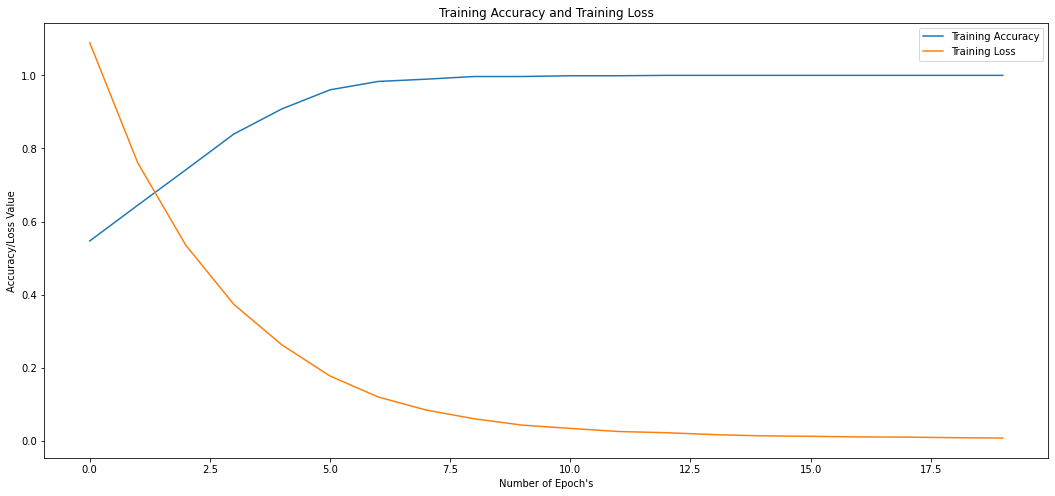

In [27]:
plt.figure(figsize = (18,8))
plt.plot(range(20), history.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), history.history['loss'], label = 'Training Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [ ]:
#evaluate the model on test data
predictions = modelCNN.evaluate(x_test, y_test)

8/8 [==============================] - 0s 18ms/step - loss: 0.0022 - accuracy: 1.0000


In [ ]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.0021595866419374943
ACCURACY : 1.0




---



------ VGG16 ------



---



In [ ]:
#Resize images to VGG16
vgg16kunsea_dir = '/content/dataset_anuka_vgg16/Tipo A_ Kunzea'
vgg16lepto_dir = '/content/dataset_anuka_vgg16/Tipo B_ Lepto'

myListKunseaImages = os.listdir(kunsea_dir)
myListLeptoImages = os.listdir(lepto_dir)

def resizeAndSave(image_name, file_name, pathToSave):
  img_size=(224,224)  
  img = Image.open(file_name) 
  img = img.resize(img_size, Image.ANTIALIAS)  
  img.save(pathToSave)
  print(pathToSave)

for cl in myListKunseaImages:
  file_name = kunsea_dir + cl 
  pathToSave = os.path.join(vgg16kunsea_dir, cl)  
  resizeAndSave(cl, file_name, pathToSave)

for cl in myListLeptoImages:
  file_name = lepto_dir + cl 
  pathToSave = os.path.join(vgg16lepto_dir, cl)  
  resizeAndSave(cl, file_name, pathToSave)


In [9]:
#Split data
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import splitfolders

splitfolders.ratio('/content/dataset_anuka_vgg16', output='/content/dataset_vgg16',
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 2400 files [00:00, 8948.88 files/s]


In [11]:
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
import tensorflow as tf

In [12]:
# define cnn model
def BuildVGG16():
  # load model
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  # mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
  
  last_layer = model.get_layer('block5_pool')
  last_output = last_layer.output
  x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(2, activation='softmax')(x) #2 clases de salida
  model = tf.keras.Model(model.input, x)  

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [13]:
modelVGG16 = BuildVGG16()
modelVGG16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [14]:
from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 20

es = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
datagen = ImageDataGenerator(rescale=1./255)
train_it = datagen.flow_from_directory('/content/dataset_vgg16/train', batch_size=64, target_size=(224, 224))
validation_it = datagen.flow_from_directory('/content/dataset_vgg16/val', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/dataset_vgg16/test', batch_size=64, target_size=(224, 224))
# fit model
historyVGG16 = modelVGG16.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=EPOCHS, 
      verbose=1,
      callbacks=[es])

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/20
30/30 [==============================] - 30s 451ms/step - loss: 0.5046 - accuracy: 0.7573 - val_loss: 0.2670 - val_accuracy: 0.8875
Epoch 2/20
30/30 [==============================] - 10s 331ms/step - loss: 0.3010 - accuracy: 0.8729 - val_loss: 0.2303 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 10s 332ms/step - loss: 0.2236 - accuracy: 0.9115 - val_loss: 0.2054 - val_accuracy: 0.9083
Epoch 4/20
30/30 [==============================] - 10s 333ms/step - loss: 0.1990 - accuracy: 0.9250 - val_loss: 0.1990 - val_accuracy: 0.9167
Epoch 5/20
30/30 [==============================] - 10s 334ms/step - loss: 0.1852 - accuracy: 0.9307 - val_loss: 0.1879 - val_accuracy: 0.9250
Epoch 6/20
30/30 [==============================] - 10s 338ms/step - loss: 0.1734 - accuracy: 0.9318 - val_loss: 0.1983 - val_accuracy: 0.8958
Epoch 7/20
30/30 [

4/4 [==============================] - 1s 278ms/step - loss: 0.1415 - accuracy: 0.9333
acc > 93.333
loss :  0.1415359526872635


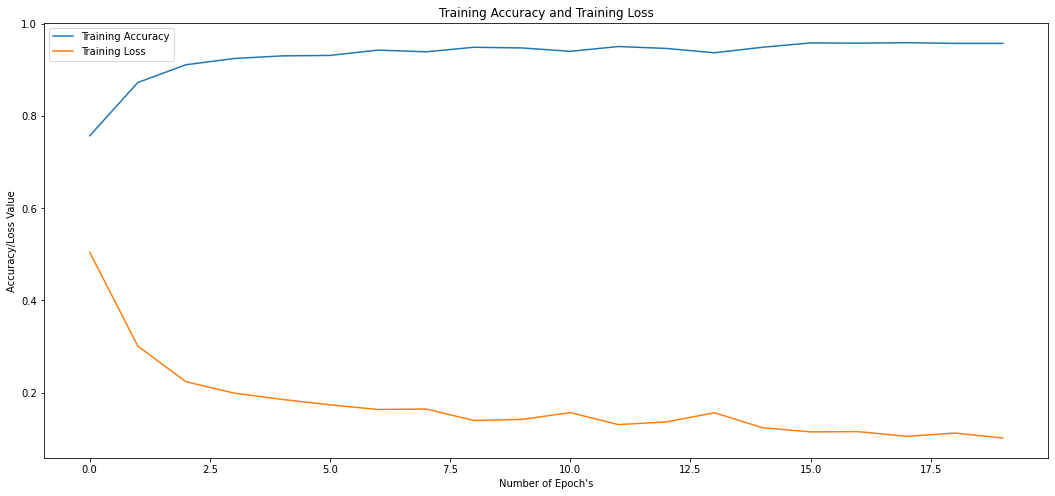

In [15]:
import matplotlib.pyplot as plt

loss, acc = modelVGG16.evaluate(test_it, steps=len(test_it), verbose=1)
print('acc > %.3f' % (acc * 100.0))
print("loss : ", loss)   


plt.figure(figsize = (18,8))
plt.plot(range(20), historyVGG16.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), historyVGG16.history['loss'], label = 'Training Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [35]:
from tqdm import tqdm
VGG16_test_path = '/content/dataset_vgg16/test/'

def load_data(dir_path):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

X_test_VGG16, y_test_VGG16, labels_VGG16 = load_data(VGG16_test_path)
labels

100%|██████████| 2/2 [00:00<00:00, 18.10it/s]

240 images loaded from /content/dataset_vgg16/test/ directory.


{0: 'Tipo A_ Kunzea', 1: 'Tipo B_ Lepto'}

In [40]:
from matplotlib import pyplot
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.figure(figsize = (6,6))
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=90)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.show()

120

                precision    recall  f1-score   support

Tipo A_ Kunzea       0.63      1.00      0.77       120
 Tipo B_ Lepto       1.00      0.42      0.59       120

      accuracy                           0.71       240
     macro avg       0.82      0.71      0.68       240
  weighted avg       0.82      0.71      0.68       240

[[120   0]
 [ 70  50]]


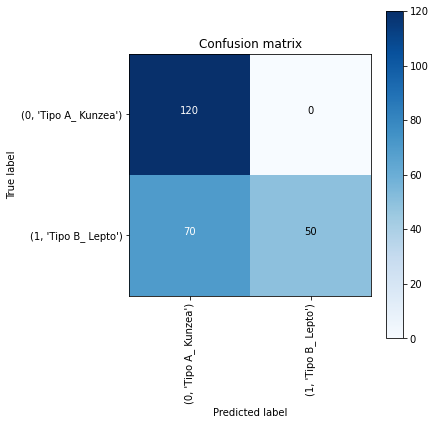

In [41]:
#CONFUSION MATRIX VGG16
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

classes = ['Tipo A_ Kunzea', 'Tipo B_ Lepto']

def validateResults(model):   
  predictions = model.predict(X_test_VGG16, batch_size=32)
  y_pred_VGG16 = np.argmax(predictions, axis=1) 
  y_true_VGG16 = np.argmax(y_test, axis=0)  
  print("\n"+ classification_report(y_test_VGG16, y_pred_VGG16, target_names=classes))
  print(confusion_matrix(y_test, y_pred_VGG16))
  confusion_mtx = confusion_matrix(y_test, y_pred_VGG16)  
  cm = plot_confusion_matrix(confusion_mtx, classes = list(labels_VGG16.items()), normalize=False)

validateResults(modelVGG16)



---



GRAFICOS COMPARTIDOS



---



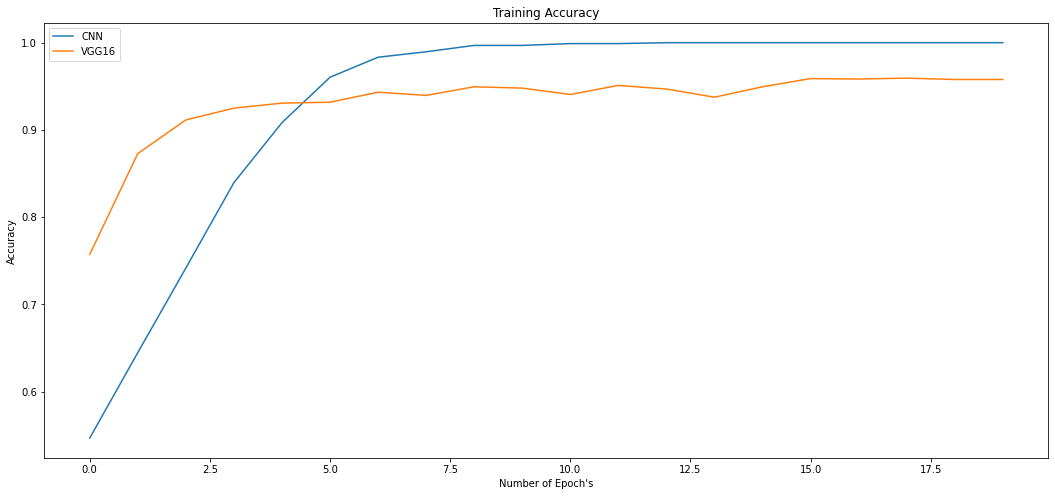

In [29]:
#gráfico compartido accuracy
plt.figure(figsize = (18,8))
plt.plot(range(20), history.history['accuracy'], label = 'CNN')
plt.plot(range(20), historyVGG16.history['accuracy'], label = 'VGG16')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc = "best")

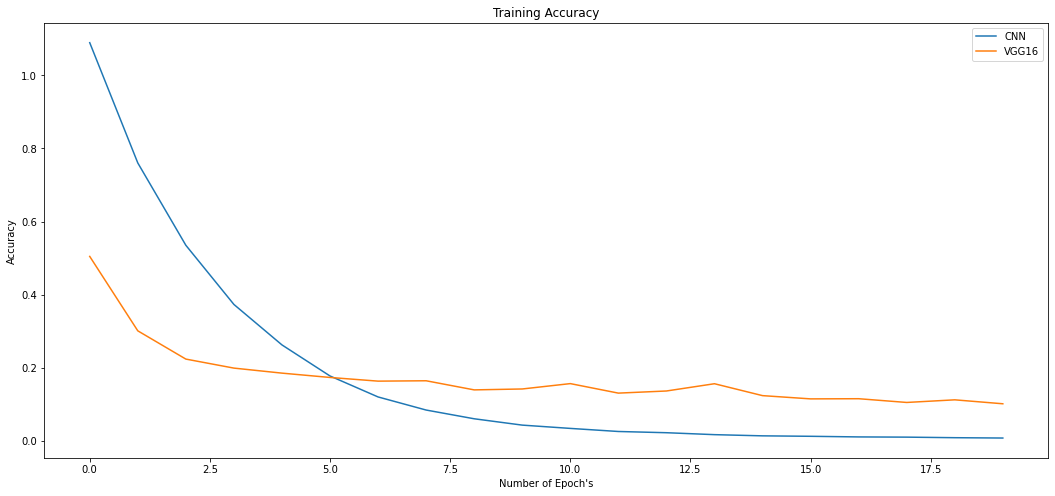

In [30]:
#gráfico compartido accuracy
plt.figure(figsize = (18,8))
plt.plot(range(20), history.history['loss'], label = 'CNN')
plt.plot(range(20), historyVGG16.history['loss'], label = 'VGG16')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc = "best")